

---

# 🌟 Ramesh Chandra Soren
### 📚 Enrollment No: **2022CSB086**
### 🏫 Department: **Computer Science and Technology**


# Logistic Regression on Breast Cancer Wisconsin Dataset

## Overview
This code implements logistic regression using the sigmoid activation function to classify breast cancer cases as malignant or benign.

## Dataset
- **Source**: Breast Cancer Wisconsin Dataset
- **Split**:
 - Training: 70%
 - Testing: 30%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define column names based on the attribute information provided
column_names = [
    'Class', 'Age', 'Menopause', 'Tumor-Size', 'Inv-Nodes', 'Node-Caps',
    'Deg-Malig', 'Breast', 'Breast-Quad', 'Irradiat'
]

# Load the dataset from a local file (adjust the path accordingly)
file_path = 'breast-cancer.data'  # Replace this with your actual file path
df = pd.read_csv(file_path, header=None, names=column_names)

# Handle missing values (replace "?" with NaN)
df.replace("?", pd.NA, inplace=True)

# Drop rows with missing values or handle them appropriately
df.dropna(inplace=True)  # You can also use imputation techniques instead of dropping

# Convert categorical columns to numeric values (encoding)
df['Class'] = df['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})
df['Node-Caps'] = df['Node-Caps'].map({'yes': 1, 'no': 0})
df['Irradiat'] = df['Irradiat'].map({'yes': 1, 'no': 0})

# For other categorical features, use one-hot encoding
df = pd.get_dummies(df, columns=['Age', 'Menopause', 'Tumor-Size', 'Inv-Nodes', 'Breast', 'Breast-Quad'], drop_first=True)

# Split data into features (X) and labels (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']              # Labels

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (193, 31)
Testing set shape: (84, 31)


# Model Implementation

## Implementation Steps

1. Load and preprocess the dataset
2. Split data into training and testing sets
3. Initialize model parameters
4. Define activation and error functions
5. Train the model
6. Evaluate performance


### 1. Initialization
- Weights and biases are initialized randomly

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of input features (30), hidden neurons, and output neurons
n_input = X_train.shape[1]  # 30 features in the dataset
n_hidden = 10               # Number of neurons in hidden layer (you can adjust this)
n_output = 1                # Output is binary (Malignant or Benign)

# Initialize weights and biases
weights_input_hidden = np.random.randn(n_input, n_hidden)
bias_hidden = np.random.randn(n_hidden)

weights_hidden_output = np.random.randn(n_hidden, n_output)
bias_output = np.random.randn(n_output)

print(f"Initial weights and biases initialized")


Initial weights and biases initialized


### 2. Activation Function
The sigmoid activation function is used:

$\sigma(z) = \frac{1}{1 + e^{-z}}$


In [ ]:
import numpy as np
import math

def sigmoid(z):
    # Clip the values of z to prevent overflow in exp
    z = np.clip(z, -500, 500)
    # Ensure z is a NumPy array
    z = np.array(z, dtype=np.float64)  # Convert z to a NumPy array if it's not
    return 1 / (1 + np.exp(-z))

#Rest of your functions remain the same

In [ ]:
# Forward propagation
def forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    # Hidden layer computations
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Output layer computations
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    return output_layer_output


### 3. Error Calculation
Error is computed using the formula:

$Error = \frac{1}{2} \times (actual\ output - computed\ output)^2$

where the computed output is $\sigma(z)$.

In [ ]:
def calculate_error(y_pred, y_true):
    return 0.5 * np.square(y_pred - y_true).mean()


In [ ]:
def backpropagation(X, y_true, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate):
    X = X.astype(np.float64)
    # Forward pass
    z_hidden = np.dot(X, weights_input_hidden) + bias_hidden
    a_hidden = sigmoid(z_hidden)

    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output
    a_output = sigmoid(z_output)

    # Error derivative for output layer
    error_output = a_output - y_true
    delta_output = error_output * a_output * (1 - a_output)

    # Error derivative for hidden layer
    error_hidden = np.dot(delta_output, weights_hidden_output.T)
    delta_hidden = error_hidden * a_hidden * (1 - a_hidden)

    # Gradient descent weight update
    weights_hidden_output -= learning_rate * np.dot(a_hidden.T, delta_output)
    bias_output -= learning_rate * delta_output.mean(axis=0)

    weights_input_hidden -= learning_rate * np.dot(X.T, delta_hidden)
    bias_hidden -= learning_rate * delta_hidden.mean(axis=0)

    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output


### 4. Hyperparameters
- Learning rate: $\eta = 0.001$

In [ ]:
learning_rate = 0.001
epochs = 1000
errors = []

for epoch in range(epochs):
    # Forward propagation
    y_pred = forward_propagation(X_train, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

    # Error calculation
    error = calculate_error(y_pred, y_train.values.reshape(-1, 1))
    errors.append(error)

    # Backpropagation
    weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backpropagation(
        X_train, y_train.values.reshape(-1, 1),
        weights_input_hidden, bias_hidden,
        weights_hidden_output, bias_output,
        learning_rate
    )

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Error: {error}')


Epoch 0, Error: 0.1766129825611707
Epoch 100, Error: 0.11948235044258178
Epoch 200, Error: 0.1096830331871558
Epoch 300, Error: 0.10502176447771176
Epoch 400, Error: 0.10152105312771062
Epoch 500, Error: 0.09865723513282937
Epoch 600, Error: 0.09628315859530252
Epoch 700, Error: 0.09428814423171422
Epoch 800, Error: 0.09257962279451155
Epoch 900, Error: 0.09108679655040298


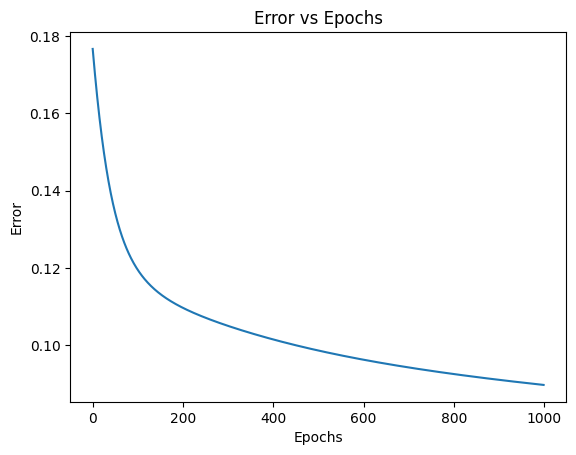

In [ ]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the test set
y_test_pred = forward_propagation(X_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)


Confusion Matrix:
 [[55  1]
 [28  0]]
Accuracy: 0.6547619047619048


In [ ]:
from sklearn.model_selection import KFold

# Define KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
cv_errors = []
cv_accuracies = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Initialize weights and biases for each fold
    weights_input_hidden = np.random.randn(n_input, n_hidden)
    bias_hidden = np.random.randn(n_hidden)

    weights_hidden_output = np.random.randn(n_hidden, n_output)
    bias_output = np.random.randn(n_output)

    # Train the model for a set number of epochs
    for epoch in range(epochs):
        # Forward propagation
        y_pred_cv = forward_propagation(X_train_cv, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

        # Backpropagation and weight updates
        weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backpropagation(
            X_train_cv, y_train_cv.values.reshape(-1, 1),
            weights_input_hidden, bias_hidden,
            weights_hidden_output, bias_output,
            learning_rate
        )

    # Predict on the validation fold
    y_test_pred_cv = forward_propagation(X_test_cv, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    y_test_pred_cv = (y_test_pred_cv > 0.5).astype(int)

    # Calculate error and accuracy for this fold
    error_cv = calculate_error(y_test_pred_cv, y_test_cv.values.reshape(-1, 1))
    accuracy_cv = accuracy_score(y_test_cv, y_test_pred_cv)

    # Store results
    cv_errors.append(error_cv)
    cv_accuracies.append(accuracy_cv)

# Print cross-validation results
print(f'Cross-Validation Errors: {cv_errors}')
print(f'Cross-Validation Accuracies: {cv_accuracies}')
print(f'Mean Error: {np.mean(cv_errors)}')
print(f'Mean Accuracy: {np.mean(cv_accuracies)}')


Cross-Validation Errors: [0.19642857142857142, 0.125, 0.15454545454545454, 0.13636363636363635, 0.14545454545454545]
Cross-Validation Accuracies: [0.6071428571428571, 0.75, 0.6909090909090909, 0.7272727272727273, 0.7090909090909091]
Mean Error: 0.15155844155844153
Mean Accuracy: 0.6968831168831169


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# After training with cross-validation, make predictions on the test set
y_test_pred = forward_propagation(X_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

# Print confusion matrix and accuracy
print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy * 100:.2f}%')


Confusion Matrix:
[[56  0]
 [27  1]]
Accuracy: 67.86%
